In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.3 MB/s eta 0:00:00


In [3]:
import pandas_datareader as pdr
pdr.get_data_fred('GS10')

,GS10
DATE,
2018-05-01,2.98
2018-06-01,2.91
2018-07-01,2.89
2018-08-01,2.89
2018-09-01,3.00
2018-10-01,3.15
2018-11-01,3.12
2018-12-01,2.83
2019-01-01,2.71


In [4]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

df_Tesla = pdr.get_data_yahoo('TSLA')

df_Tesla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df_Tesla.shape

(3215, 6)

In [6]:
df_Tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-30,195.580002,197.330002,194.419998,195.279999,195.279999,110252200
2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,169638500
2023-04-03,199.910004,202.690002,192.199997,194.770004,194.770004,169545900
2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800
2023-04-05,190.520004,190.679993,183.759995,185.520004,185.520004,133556500


In [7]:
df_Tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3215.000000,3215.000000,3215.000000,3215.000000,3215.000000,3.215000e+03
mean,61.195663,62.581862,59.678105,61.160856,61.160856,9.520755e+07
std,96.175075,98.398127,93.680877,96.064229,96.064229,8.181454e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.436334,9.651333,9.181334,9.373333,9.373333,4.333800e+07
50%,16.464001,16.648666,16.200001,16.458000,16.458000,7.713900e+07
75%,33.278334,34.331667,32.211000,33.571001,33.571001,1.207484e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<AxesSubplot:xlabel='Date'>

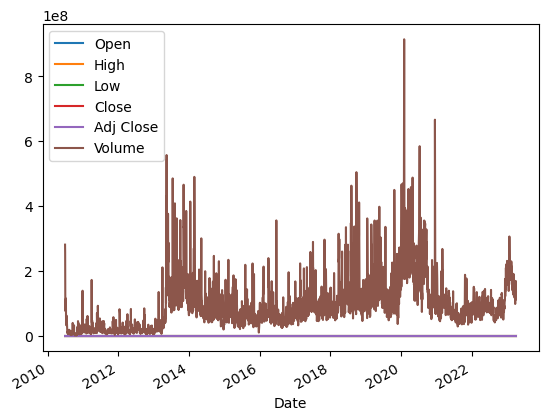

In [8]:
df_Tesla.plot()

<AxesSubplot:xlabel='Date'>

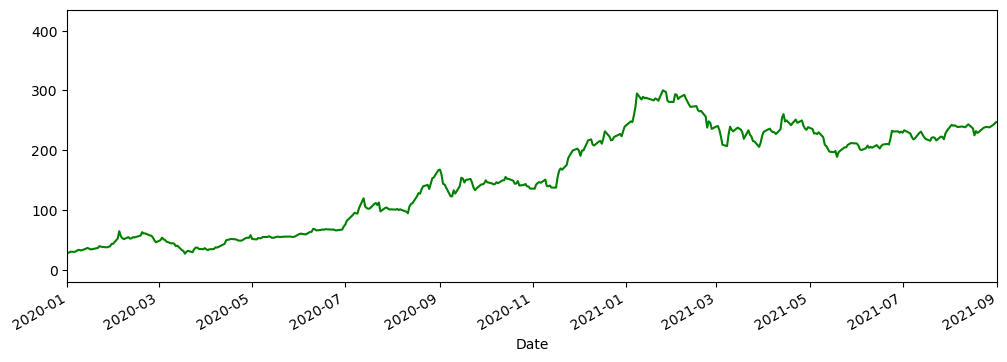

In [9]:
df_Tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], figsize=(12,4), c='green')

In [10]:
df_Tesla.loc['2020-01-01':'2021-09-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2021-08-26,236.103333,238.466660,232.539993,233.720001,233.720001,39642900
2021-08-27,235.000000,238.333328,234.033340,237.306671,237.306671,41501400
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600


In [11]:
index=df_Tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_Tesla.loc['2020-01-01':'2021-09-01']['Open']

In [12]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [13]:
%matplotlib inline

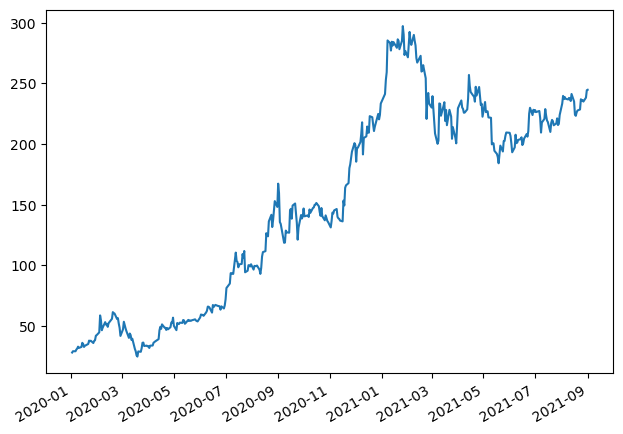

In [14]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [15]:
df_Tesla=df_Tesla.reset_index()

In [16]:
df_Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3215 non-null   datetime64[ns]
 1   Open       3215 non-null   float64       
 2   High       3215 non-null   float64       
 3   Low        3215 non-null   float64       
 4   Close      3215 non-null   float64       
 5   Adj Close  3215 non-null   float64       
 6   Volume     3215 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 175.9 KB


In [17]:
df_Tesla = df_Tesla.set_index('Date', drop=True)

In [18]:
df_Tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [19]:
df_Tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


In [20]:
df_Tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<AxesSubplot:xlabel='Date'>

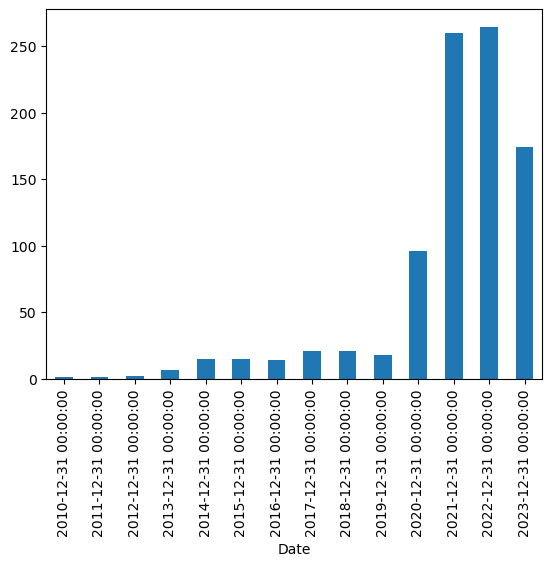

In [21]:
df_Tesla['Open'].resample(rule='A').mean().plot(kind='bar')

In [22]:
df_Tesla['Open'].resample(rule='M').max()

Date
2010-06-30      1.719333
2010-07-31      1.666667
2010-08-31      1.463333
2010-09-30      1.476667
2010-10-31      1.426000
                 ...    
2022-12-31    197.080002
2023-01-31    178.050003
2023-02-28    211.759995
2023-03-31    206.210007
2023-04-30    199.910004
Freq: M, Name: Open, Length: 155, dtype: float64

In [23]:
df_Tesla['High'].rolling(10).mean().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    1.421333
2010-07-14    1.389000
2010-07-15    1.329533
2010-07-16    1.298733
2010-07-19    1.293067
2010-07-20    1.305400
2010-07-21    1.333867
2010-07-22    1.358733
2010-07-23    1.383133
2010-07-26    1.406000
2010-07-27    1.422933
Name: High, dtype: float64

In [24]:
df_Tesla['Open: 30 days rolling'] = df_Tesla['Open'].rolling(10).mean()

In [25]:
df_Tesla.head(20)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


<AxesSubplot:xlabel='Date'>

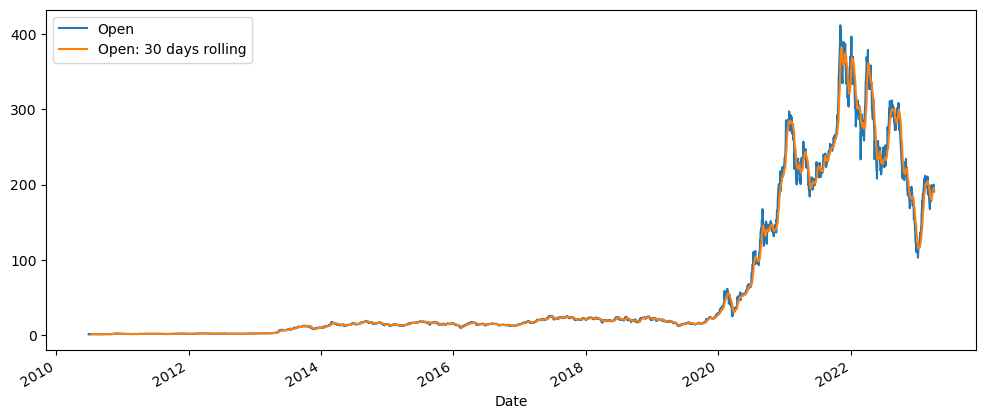

In [26]:
df_Tesla[['Open', 'Open: 30 days rolling']].plot(figsize=(12, 5))